## Dataset Description

### Etiquetas

El conjunto de datos se proporciona en formato CSV (train.csv) y contiene información sobre 732 pacientes con diferentes grados de enfermedad (1-4) o ausencia de la misma (0). Este dato puede obtenerse de la columna 'label'.

### Características

Además, el conjunto de datos está compuesto por 13 características adicionales que describen las condiciones de salud de cada uno de los pacientes. Estas características se describen a continuación:

1. **age**: Edad del paciente.
2. **sex**: Sexo del paciente.
3. **cp**: Tipo de dolor de pecho:
   - 1: Angina típica
   - 2: Angina atípica
   - 3: Dolor no-anginoso
   - 4: Asintomático
4. **trestbps**: Presión arterial en reposo (en mm Hg al ingreso en el hospital).
5. **chol**: Colesterol sérico en mg/dl.
6. **fbs**: Dolor provocado por el esfuerzo (1 = sí; 0 = no).
7. **restecg**: Resultados electrocardiográficos en reposo:
   - 0: Normal
   - 1: Presenta anormalidad de la onda ST-T
   - 2: Presenta probable o definida hipertrofía ventricular izquierda
8. **thalach**: Frecuencia cardiaca en reposo.
9. **exang**: Angina inducida por el ejercicio (1 = sí; 0 = no).
10. **oldpeak**: Depresión del ST inducida por el ejercicio en relación con el reposo.
11. **slope**: La pendiente del segmento ST en ejercicio máximo:
    - 1: Pendiente ascendente
    - 2: Plano
    - 3: Pendiente descendente
12. **ca**: Número de vasos mayores (0-3) coloreados por fluoroscopía.
13. **thal**:
    - 3: Normal
    - 6: Defecto fijo
    - 7: Defecto reversible


## 1- Analisis exploratorio

### A - Análisis descriptivo del dataset de entrenamiento (TRAIN)

In [813]:
import pandas as pd
train = pd.read_csv("train.csv")
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51.0,1.0,1.0,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0
1,54.0,1.0,3.0,120.0,237.0,0.0,0.0,150.0,1.0,1.5,-9.0,-9.0,7.0,2
2,63.0,1.0,4.0,140,0,?,2.0,149,0,2,1,?,?,2
3,52.0,0.0,2.0,140.0,-9.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0
4,55.0,1.0,4.0,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46.0,1.0,3.0,120.0,230.0,0.0,0.0,150.0,0.0,0.0,-9.0,-9.0,-9.0,0
728,62.0,1.0,3.0,?,204,0,1.0,?,?,?,?,?,?,1
729,43.0,0.0,3.0,122.0,213.0,0.0,0.0,165.0,0.0,0.2,2.0,0.0,3.0,0
730,68.0,1.0,3.0,150,195,1,0.0,132,0,0,?,?,6,1


In [814]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    object 
 4   chol      732 non-null    object 
 5   fbs       732 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    object 
 8   exang     732 non-null    object 
 9   oldpeak   732 non-null    object 
 10  slope     732 non-null    object 
 11  ca        732 non-null    object 
 12  thal      732 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [815]:
train.describe()

,age,sex,cp,restecg,label
count,732.000000,732.000000,732.000000,732.000000,732.000000
mean,53.364754,0.789617,3.250000,0.602459,1.132514
std,9.306868,0.407859,0.923363,0.802966,1.257615
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,0.000000,0.000000
50%,54.000000,1.000000,4.000000,0.000000,1.000000
75%,60.000000,1.000000,4.000000,1.000000,2.000000
max,76.000000,1.000000,4.000000,2.000000,4.000000


In [816]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = train[train == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TRAIN:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(train)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TRAIN:")
print(missing_percentage)

Valores faltantes por variable en TRAIN:
ca          249
thal        169
slope        95
fbs          58
oldpeak      49
trestbps     47
thalach      44
exang        44
chol          5
age           0
sex           0
cp            0
restecg       0
label         0
dtype: int64

Porcentaje de valores faltantes por variable en TRAIN:
ca          34.016393
thal        23.087432
slope       12.978142
fbs          7.923497
oldpeak      6.693989
trestbps     6.420765
thalach      6.010929
exang        6.010929
chol         0.683060
age          0.000000
sex          0.000000
cp           0.000000
restecg      0.000000
label        0.000000
dtype: float64


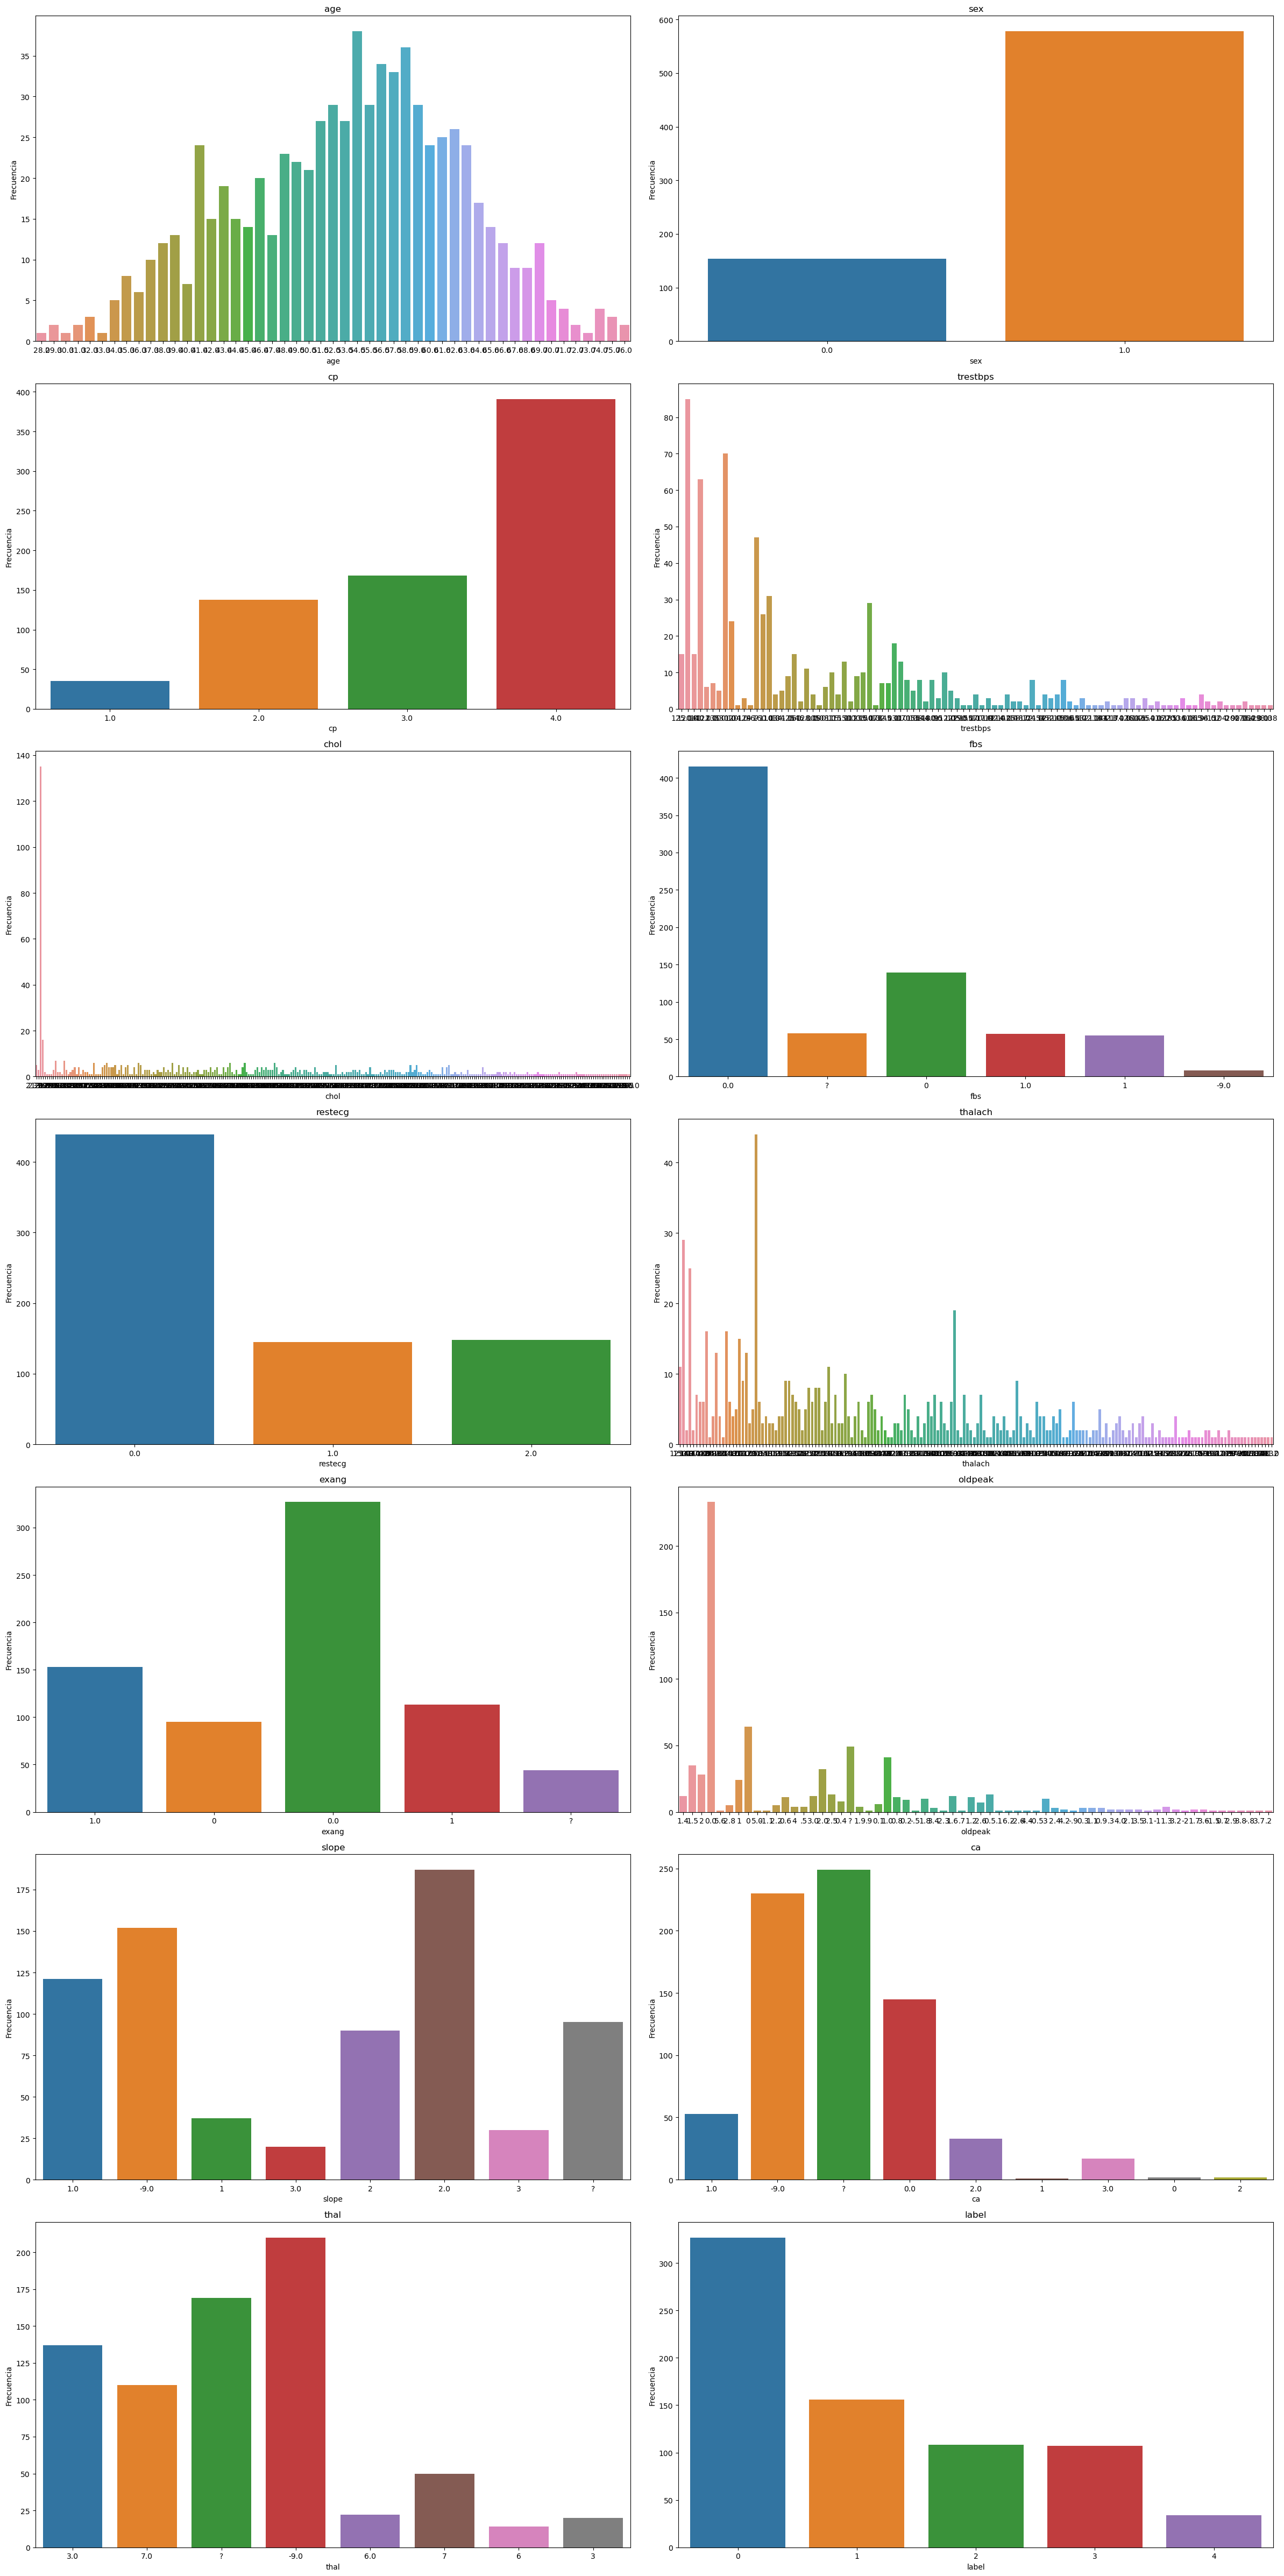

In [817]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'label']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=train, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### B - Análisis descriptivo del dataset de testeo (TEST)

In [818]:
test = pd.read_csv("test.csv")
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,1.0,4.0,156,173,0,2,119,1,3,3,?,?
1,52.0,1.0,2.0,160.0,196.0,0.0,0.0,165.0,0.0,0.0,-9.0,-9.0,-9.0
2,48.0,1.0,2.0,100.0,-9.0,0.0,0.0,100.0,0.0,0.0,-9.0,-9.0,-9.0
3,62.0,1.0,4.0,115,0,?,0,128,1,2.5,3,?,?
4,51.0,1.0,3.0,110.0,175.0,0.0,0.0,123.0,0.0,0.6,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54.0,1.0,4.0,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,-9.0,-9.0
180,55.0,1.0,2.0,110,214,1,1,180,0,?,?,?,?
181,67.0,1.0,3.0,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0
182,59.0,1.0,1.0,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0


In [819]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    float64
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    object 
 4   chol      184 non-null    object 
 5   fbs       184 non-null    object 
 6   restecg   184 non-null    object 
 7   thalach   184 non-null    object 
 8   exang     184 non-null    object 
 9   oldpeak   184 non-null    object 
 10  slope     184 non-null    object 
 11  ca        184 non-null    object 
 12  thal      184 non-null    object 
dtypes: float64(3), object(10)
memory usage: 18.8+ KB


In [820]:
# Contar la cantidad de filas con valores faltantes
missing_values_count = test[test == '?'].count()

# Ordenar los valores de mayor a menor
missing_values_count_sorted = missing_values_count.sort_values(ascending=False)

# Mostrar el conteo de valores faltantes por característica ordenados
print("Valores faltantes por variable en TEST:")
print(missing_values_count_sorted)

# Calcular el porcentaje de valores faltantes por característica
missing_percentage = (missing_values_count_sorted / len(test)) * 100

# Mostrar el porcentaje de valores faltantes por característica
print("\nPorcentaje de valores faltantes por variable en TEST:")
print(missing_percentage)

Valores faltantes por variable en TEST:
ca          69
thal        49
slope       24
fbs         23
oldpeak     13
trestbps    11
thalach     10
exang       10
chol         2
restecg      1
age          0
sex          0
cp           0
dtype: int64

Porcentaje de valores faltantes por variable en TEST:
ca          37.500000
thal        26.630435
slope       13.043478
fbs         12.500000
oldpeak      7.065217
trestbps     5.978261
thalach      5.434783
exang        5.434783
chol         1.086957
restecg      0.543478
age          0.000000
sex          0.000000
cp           0.000000
dtype: float64


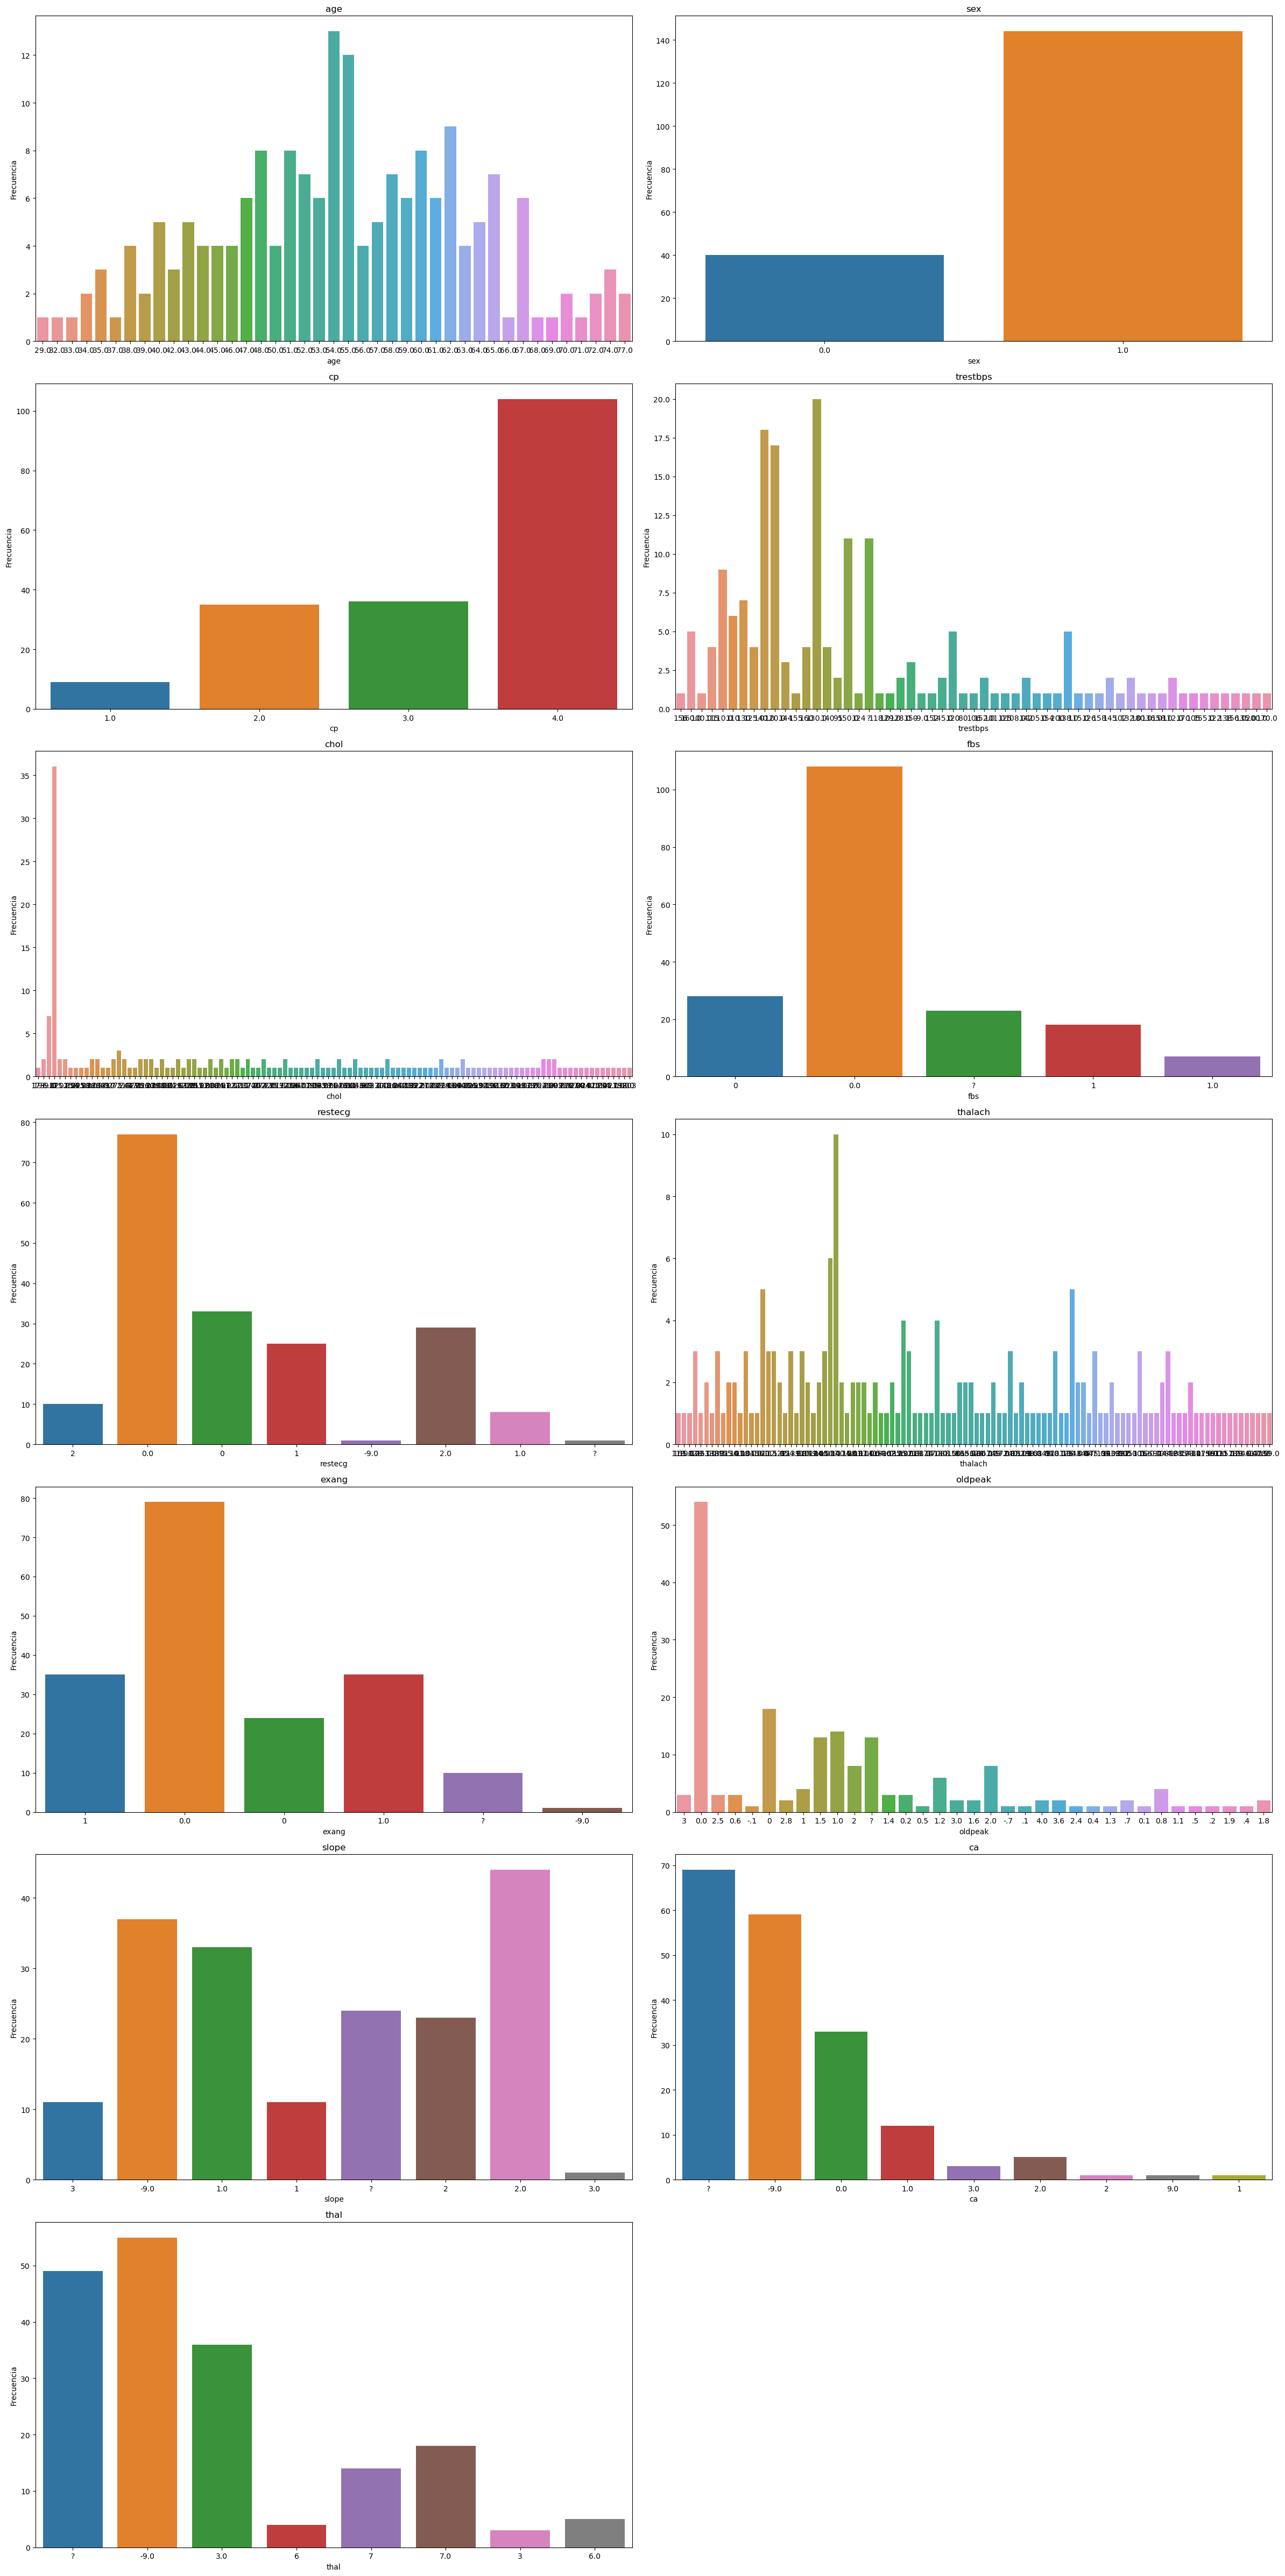

In [821]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Subgráficos
num_cols = 2
num_rows = int(np.ceil(len(cols) / num_cols))

# Crear subplots para cada variable 
plt.figure(figsize=(24, 48))
for i, col in enumerate(cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(data=test, x=col)
    plt.title(f"{col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

## 2 -Tratamiento del dataset

### A- Transformaciones dataset TRAIN

Definicion de datatypes

In [822]:
train = pd.read_csv("train.csv")

In [823]:
# Reemplazar '?' con NaN 
train= train.replace('?', np.nan)

In [824]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    float64
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  685 non-null    object 
 4   chol      727 non-null    object 
 5   fbs       674 non-null    object 
 6   restecg   732 non-null    float64
 7   thalach   688 non-null    object 
 8   exang     688 non-null    object 
 9   oldpeak   683 non-null    object 
 10  slope     637 non-null    object 
 11  ca        483 non-null    object 
 12  thal      563 non-null    object 
 13  label     732 non-null    int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 80.2+ KB


In [825]:
# Convertir variables a int
int_cols = ['age',
            'label']
train[int_cols] = train[int_cols].astype('int64')

# Convertir variables a float
float_cols = ['trestbps', 
                'chol',
                'thalach', 
                'oldpeak',
                'ca']

train[float_cols] = train[float_cols].apply(pd.to_numeric, errors='coerce')

# Iterar sobre las columnas numéricas y reemplazar los valores negativos con NaN
for col in float_cols:
    train[col] = train[col].apply(lambda x: np.nan if x < 0 else x)

# Convertir variables a cat
categorical_cols = ['restecg', 
                    'slope',
                    'fbs', 
                    'thal',
                    'exang',
                    'cp',
                    'sex']

train[categorical_cols] = train[categorical_cols].astype('float')

# Reemplazar '?' con NaN en las  cat
train[categorical_cols] = train[categorical_cols].replace('?', np.nan)


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    int64  
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  685 non-null    float64
 4   chol      711 non-null    float64
 5   fbs       674 non-null    float64
 6   restecg   732 non-null    float64
 7   thalach   688 non-null    float64
 8   exang     688 non-null    float64
 9   oldpeak   673 non-null    float64
 10  slope     637 non-null    float64
 11  ca        253 non-null    float64
 12  thal      563 non-null    float64
 13  label     732 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 80.2 KB


Reemplazo de ***valores faltantes NaN*** por la media en las variables float e int, y por la moda en las variables cat.  


In [826]:
# Iterar sobre las columnas categóricas y reemplazar los NaN con el valor más frecuente
for col in categorical_cols:
    train[col].fillna(train[col].mode()[0], inplace=True)


# Iterar sobre las columnas categóricas y reemplazar los NaN con la media
for col in float_cols:
    train[col].fillna(train[col].mean(), inplace=True)

In [827]:
train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1.0,1.0,125.000000,213.000000,0.0,2.0,125.000000,1.0,1.400000,1.0,1.0000,3.0,0
1,54,1.0,3.0,120.000000,237.000000,0.0,0.0,150.000000,1.0,1.500000,-9.0,0.6917,7.0,2
2,63,1.0,4.0,140.000000,0.000000,0.0,2.0,149.000000,0.0,2.000000,1.0,0.6917,-9.0,2
3,52,0.0,2.0,140.000000,199.956399,0.0,0.0,140.000000,0.0,0.000000,-9.0,0.6917,-9.0,0
4,55,1.0,4.0,140.000000,217.000000,0.0,0.0,111.000000,1.0,5.600000,3.0,0.0000,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,46,1.0,3.0,120.000000,230.000000,0.0,0.0,150.000000,0.0,0.000000,-9.0,0.6917,-9.0,0
728,62,1.0,3.0,131.975182,204.000000,0.0,1.0,138.132267,0.0,0.912036,2.0,0.6917,-9.0,1
729,43,0.0,3.0,122.000000,213.000000,0.0,0.0,165.000000,0.0,0.200000,2.0,0.0000,3.0,0
730,68,1.0,3.0,150.000000,195.000000,1.0,0.0,132.000000,0.0,0.000000,2.0,0.6917,6.0,1


Comprobacion de ausencia de valores nulos e integridad del dataset

In [828]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       732 non-null    int64  
 1   sex       732 non-null    float64
 2   cp        732 non-null    float64
 3   trestbps  732 non-null    float64
 4   chol      732 non-null    float64
 5   fbs       732 non-null    float64
 6   restecg   732 non-null    float64
 7   thalach   732 non-null    float64
 8   exang     732 non-null    float64
 9   oldpeak   732 non-null    float64
 10  slope     732 non-null    float64
 11  ca        732 non-null    float64
 12  thal      732 non-null    float64
 13  label     732 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 80.2 KB


### B- Transformaciones dataset TEST

Definicion de datatypes

In [829]:
test = pd.read_csv("test.csv")

In [830]:
# Reemplazar '?' con NaN en las  cat
test[categorical_cols] = test[categorical_cols].replace('?', np.nan)


# Convertir variables a int
int_cols = ['age']
test[int_cols] = test[int_cols].astype('int64')

# Convertir variables a float
float_cols = ['trestbps', 
                'chol',
                'thalach', 
                'oldpeak',
                'ca']

test[float_cols] = test[float_cols].apply(pd.to_numeric, errors='coerce')

# Convertir variables a cat
categorical_cols = ['restecg', 
                    'slope',
                    'fbs', 
                    'thal',
                    'exang',
                    'cp',
                    'sex']

test[categorical_cols] = test[categorical_cols].astype('float')


test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  173 non-null    float64
 4   chol      182 non-null    float64
 5   fbs       161 non-null    float64
 6   restecg   183 non-null    float64
 7   thalach   174 non-null    float64
 8   exang     174 non-null    float64
 9   oldpeak   171 non-null    float64
 10  slope     160 non-null    float64
 11  ca        115 non-null    float64
 12  thal      135 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 18.8 KB


Reemplazo de ***valores faltantes NaN*** por la media en las variables float e int, y por la moda en las variables cat


In [831]:
# Iterar sobre las columnas categóricas y reemplazar los NaN con el valor más frecuente
for col in categorical_cols:
    test[col].fillna(test[col].mode()[0], inplace=True)


# Iterar sobre las columnas categóricas y reemplazar los NaN con la media
for col in float_cols:
    test[col].fillna(test[col].mean(), inplace=True)

In [832]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       184 non-null    int64  
 1   sex       184 non-null    float64
 2   cp        184 non-null    float64
 3   trestbps  184 non-null    float64
 4   chol      184 non-null    float64
 5   fbs       184 non-null    float64
 6   restecg   184 non-null    float64
 7   thalach   184 non-null    float64
 8   exang     184 non-null    float64
 9   oldpeak   184 non-null    float64
 10  slope     184 non-null    float64
 11  ca        184 non-null    float64
 12  thal      184 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 18.8 KB


In [833]:
test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1.0,4.0,156.000000,173.0,0.0,2.0,119.000000,1.0,3.000000,3.0,-4.243478,-9.0
1,52,1.0,2.0,160.000000,196.0,0.0,0.0,165.000000,0.0,0.000000,-9.0,-9.000000,-9.0
2,48,1.0,2.0,100.000000,-9.0,0.0,0.0,100.000000,0.0,0.000000,-9.0,-9.000000,-9.0
3,62,1.0,4.0,115.000000,0.0,0.0,0.0,128.000000,1.0,2.500000,3.0,-4.243478,-9.0
4,51,1.0,3.0,110.000000,175.0,0.0,0.0,123.000000,0.0,0.600000,1.0,0.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1.0,4.0,200.000000,198.0,0.0,0.0,142.000000,1.0,2.000000,2.0,-9.000000,-9.0
180,55,1.0,2.0,110.000000,214.0,1.0,1.0,180.000000,0.0,0.854386,2.0,-4.243478,-9.0
181,67,1.0,3.0,152.000000,212.0,0.0,2.0,150.000000,0.0,0.800000,2.0,0.000000,7.0
182,59,1.0,1.0,170.000000,288.0,0.0,2.0,159.000000,0.0,0.200000,2.0,0.000000,7.0


## 3 -Entrenamiento del Modelo

Eleccion de modelo

In [834]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Identificar las filas con valores negativos
valores_negativos = (train < 0).any(axis=1)

#Eliminar las filas con valores negativos
train = train[~valores_negativos]

# Paso 1: Separacion entre Label y las variables independientes
X = train.drop('label', axis=1)  # Variables independientes
y = train['label']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Entrenar y evaluar cada modelo
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse}, R2: {r2}")

Model: LinearRegression, MSE: 0.902425329348983, R2: 0.40345750923378176
Model: Ridge, MSE: 0.9026654187776155, R2: 0.4032987996529388
Model: Lasso, MSE: 1.2591429008087867, R2: 0.16765164069480654
Model: DecisionTreeRegressor, MSE: 1.9264705882352942, R2: -0.27348105789849875
Model: RandomForestRegressor, MSE: 0.8950279411764707, R2: 0.4083475053609722


Entrenamiento de modelo de ***regresion lineal***

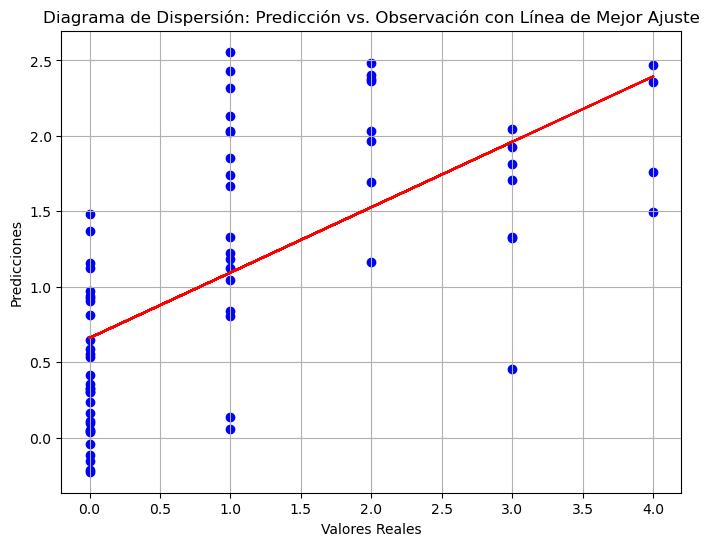

Error cuadrático medio en conjunto de entrenamiento: 0.6674162690175016
Error cuadrático medio en conjunto de prueba: 0.902425329348983
R2 train 0.5548692242813059
R2 test 0.40345750923378176


In [835]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Paso 2: Seleccionar y entrenar el modelo de regresión
model = LinearRegression()  
model.fit(X_train, y_train)

# Paso 3: Evaluar el rendimiento del modelo
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

#Metricas de performance
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

valores_reales = y_test

# Calcular la regresión lineal entre los valores reales y las predicciones
model_chart = model
model_chart.fit(valores_reales.to_numpy().reshape(-1, 1), test_predictions)

# Obtener los coeficientes de la regresión lineal
pendiente = model_chart.coef_[0]
intercepto = model_chart.intercept_

# Crear el diagrama de dispersión con la línea de mejor ajuste
plt.figure(figsize=(8, 6))
plt.scatter(valores_reales, test_predictions, color='blue')
plt.plot(valores_reales, pendiente * valores_reales + intercepto, color='red')  # Línea de mejor ajuste
plt.title('Diagrama de Dispersión: Predicción vs. Observación con Línea de Mejor Ajuste')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

print("Error cuadrático medio en conjunto de entrenamiento:", train_mse)
print("Error cuadrático medio en conjunto de prueba:", test_mse)
print("R2 train", train_r2)
print("R2 test", test_r2)



## 4- Aplicación del modelo

In [836]:
# Hacer predicciones en los datos de test
test_model = test
model = LinearRegression()  
model.fit(X_train, y_train)

# Agregar una columna 'label' con las predicciones a test y  redondear
test_model['label'] = model.predict(test_model).round().clip(0, 4)

# Crear copia para hacer groupby
test_model = test.copy()

# Agregar una columna 'label' con las predicciones al DataFrame de prueba y redondearlas
test_model['label'] = model.predict(test_model.drop('label', axis=1)).round().clip(0, 4)

# Calcular la frecuencia de los valores de la variable 'label' usando groupby
label_freq = test_model.groupby('label').size()

print(label_freq)

test_model


label
0.0    154
1.0     17
2.0     10
3.0      3
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,57,1.0,4.0,156.000000,173.0,0.0,2.0,119.000000,1.0,3.000000,3.0,-4.243478,-9.0,0.0
1,52,1.0,2.0,160.000000,196.0,0.0,0.0,165.000000,0.0,0.000000,-9.0,-9.000000,-9.0,0.0
2,48,1.0,2.0,100.000000,-9.0,0.0,0.0,100.000000,0.0,0.000000,-9.0,-9.000000,-9.0,0.0
3,62,1.0,4.0,115.000000,0.0,0.0,0.0,128.000000,1.0,2.500000,3.0,-4.243478,-9.0,0.0
4,51,1.0,3.0,110.000000,175.0,0.0,0.0,123.000000,0.0,0.600000,1.0,0.000000,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,54,1.0,4.0,200.000000,198.0,0.0,0.0,142.000000,1.0,2.000000,2.0,-9.000000,-9.0,0.0
180,55,1.0,2.0,110.000000,214.0,1.0,1.0,180.000000,0.0,0.854386,2.0,-4.243478,-9.0,0.0
181,67,1.0,3.0,152.000000,212.0,0.0,2.0,150.000000,0.0,0.800000,2.0,0.000000,7.0,1.0
182,59,1.0,1.0,170.000000,288.0,0.0,2.0,159.000000,0.0,0.200000,2.0,0.000000,7.0,0.0


Aplicación de predicciones y creacion de archivo *csv

In [837]:
# Creacion de ID
test_model['label'].reset_index()


# Renombrar la columna 'index' a 'ID'
test_model['ID'] = test_model.index
test_model = test_model[['ID', 'label']]

# Guardar el DataFrame en un archivo CSV
test_model.to_csv('sample_submission.csv', index=False)
